In [78]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
import datetime as dt

In [79]:
%time
file = 'featureEngineering_yifeng_final3.csv'
myData = pd.read_csv(file)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 25.7 µs


In [80]:
myData.shape

(1002789, 314)

In [81]:
myData.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,ssn-address-zip5_0_count_ssn-address-zip5_180_count_Ave,ssn-address-zip5_1_count_ssn-address-zip5_7_count_Ave,ssn-address-zip5_1_count_ssn-address-zip5_30_count_Ave,ssn-address-zip5_1_count_ssn-address-zip5_180_count_Ave,ssn-name-dob_0_count_ssn-name-dob_7_count_Ave,ssn-name-dob_0_count_ssn-name-dob_30_count_Ave,ssn-name-dob_0_count_ssn-name-dob_180_count_Ave,ssn-name-dob_1_count_ssn-name-dob_7_count_Ave,ssn-name-dob_1_count_ssn-name-dob_30_count_Ave,ssn-name-dob_1_count_ssn-name-dob_180_count_Ave
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00


In [83]:
#myData.drop('Unnamed: 0', axis =1 , inplace = True)
#myData.drop('V1', axis =1 , inplace = True)
#myData.drop('Recnum', axis =1 , inplace = True)

In [84]:
myData.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,ssn-address-zip5_0_count_ssn-address-zip5_180_count_Ave,ssn-address-zip5_1_count_ssn-address-zip5_7_count_Ave,ssn-address-zip5_1_count_ssn-address-zip5_30_count_Ave,ssn-address-zip5_1_count_ssn-address-zip5_180_count_Ave,ssn-name-dob_0_count_ssn-name-dob_7_count_Ave,ssn-name-dob_0_count_ssn-name-dob_30_count_Ave,ssn-name-dob_0_count_ssn-name-dob_180_count_Ave,ssn-name-dob_1_count_ssn-name-dob_7_count_Ave,ssn-name-dob_1_count_ssn-name-dob_30_count_Ave,ssn-name-dob_1_count_ssn-name-dob_180_count_Ave
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,...,180.00,7.00,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00


In [85]:
myData = myData.sort_values(by = 'date').copy()

In [86]:
myData.shape

(1002789, 314)

In [87]:
myData['FraudLabel'] = myData['fraud_label']

In [88]:
myData['RandNum'] = np.random.randint(1, 1000000, myData.shape[0])

In [89]:
myData = myData.reset_index().copy()

In [90]:
myData.drop('index', axis =1 , inplace = True)

In [91]:
myData.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,ssn-address-zip5_1_count_ssn-address-zip5_30_count_Ave,ssn-address-zip5_1_count_ssn-address-zip5_180_count_Ave,ssn-name-dob_0_count_ssn-name-dob_7_count_Ave,ssn-name-dob_0_count_ssn-name-dob_30_count_Ave,ssn-name-dob_0_count_ssn-name-dob_180_count_Ave,ssn-name-dob_1_count_ssn-name-dob_7_count_Ave,ssn-name-dob_1_count_ssn-name-dob_30_count_Ave,ssn-name-dob_1_count_ssn-name-dob_180_count_Ave,FraudLabel,RandNum
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0,...,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00,0,472720
1,1889,2016-01-01,475159945,EUMRRUERR,UAEEAU,1584 UEXXT BLVD,30587,19660420,5986308834,0,...,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00,0,313319
2,1890,2016-01-01,543416542,SJXXTTRUZ,UZXTMMSS,7336 RJMUU RD,15442,19520528,89471157,0,...,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00,0,766908
3,1891,2016-01-01,994253127,USJJMAXUZ,RAZRZZJJ,7102 SAJJU ST,4372,19110919,9508399870,0,...,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00,0,501335
4,1892,2016-01-01,246846730,UMZRTTSZJ,SMZRXJUM,8711 SJJJR RD,35220,19540520,1884736185,0,...,30.00,180.00,7.00,30.00,180.00,7.00,30.00,180.00,0,883392


# Calculate FDR, KS Table for all the candidate variables

In [92]:
myData['fraud_label'] = myData['fraud_label'].astype('float64')
Three_Percent = round(0.03 * len(myData))
TotalFraud = myData['fraud_label'].sum()
FeatureTable = pd.DataFrame(columns=['Variable', 'FDR'])

for column in myData.columns:
    if column == 'fraud_label':
        continue
    
    tempDF = myData[[column, 'fraud_label']]
    
    tempDF1 = tempDF.sort_values(by = column, ascending = True)
    FDR1 = sum(tempDF1.iloc[:Three_Percent,:]['fraud_label'])/ TotalFraud
    
    tempDF2 = tempDF.sort_values(by = column, ascending = False)
    FDR2 = sum(tempDF2.iloc[:Three_Percent,:]['fraud_label'])/ TotalFraud
    
    Final_FDR = max(FDR1, FDR2)
    KS = sps.ks_2samp(myData.loc[myData['fraud_label'] == 0, column], myData.loc[myData['fraud_label'] == 1, column])
    
    FeatureTable = FeatureTable.append({'Variable': column, 'FDR': float(Final_FDR), 'KS':KS[0]}, ignore_index = True)

In [93]:
FeatureTable['FDR_Rank'] = FeatureTable['FDR'].rank(ascending = 0)
FeatureTable['KS_Rank'] = FeatureTable['KS'].rank(ascending = 0)
FeatureTable['FINAL_Rank'] = FeatureTable['FDR_Rank'] +  FeatureTable['KS_Rank']

In [94]:
FeatureTable.sort_values(by = 'FINAL_Rank', ascending = True)

,Variable,FDR,KS,FDR_Rank,KS_Rank,FINAL_Rank
313,FraudLabel,1.00,1.00,1.00,1.00,2.00
38,address_count30_date,0.35,0.33,2.00,2.00,4.00
66,address-zip5_count30_date,0.35,0.33,3.00,3.00,6.00
67,address-zip5_count90_date,0.35,0.32,5.00,4.00,9.00
39,address_count90_date,0.35,0.32,4.00,5.00,9.00
40,address_count180_date,0.34,0.32,7.00,6.00,13.00
68,address-zip5_count180_date,0.34,0.32,6.00,7.00,13.00
65,address-zip5_count7_date,0.32,0.30,8.00,8.00,16.00
37,address_count7_date,0.32,0.30,9.00,9.00,18.00
64,address-zip5_count3_date,0.30,0.28,11.00,12.00,23.00


In [95]:
FeatureTable.head(3)

,Variable,FDR,KS,FDR_Rank,KS_Rank,FINAL_Rank
0,record,0.03,0.02,314.00,267.00,581.00
1,date,0.03,0.02,307.00,266.00,573.00
2,ssn,0.03,0.02,312.00,269.00,581.00


In [97]:
FeatureTable = FeatureTable.sort_values(by = 'FINAL_Rank', ascending = True)
FeatureTable.to_excel('Filter Selection_yifeng_final.xls')

# Filter

In [98]:
#inTimeData.head(3)

In [99]:
FeatureTable = FeatureTable.sort_values(by = 'FINAL_Rank', ascending = True).copy()
FeatureTable.head(10)

,Variable,FDR,KS,FDR_Rank,KS_Rank,FINAL_Rank
313,FraudLabel,1.00,1.00,1.00,1.00,2.00
38,address_count30_date,0.35,0.33,2.00,2.00,4.00
66,address-zip5_count30_date,0.35,0.33,3.00,3.00,6.00
67,address-zip5_count90_date,0.35,0.32,5.00,4.00,9.00
39,address_count90_date,0.35,0.32,4.00,5.00,9.00
40,address_count180_date,0.34,0.32,7.00,6.00,13.00
68,address-zip5_count180_date,0.34,0.32,6.00,7.00,13.00
65,address-zip5_count7_date,0.32,0.30,8.00,8.00,16.00
37,address_count7_date,0.32,0.30,9.00,9.00,18.00
64,address-zip5_count3_date,0.30,0.28,11.00,12.00,23.00


In [100]:
myData.shape

(1002789, 316)

In [101]:
Good_Feature = FeatureTable.iloc[:180,:][['Variable']]

In [102]:
Good_Feature_list = list(Good_Feature['Variable'])
Good_Feature_list

['FraudLabel',
 'address_count30_date',
 'address-zip5_count30_date',
 'address-zip5_count90_date',
 'address_count90_date',
 'address_count180_date',
 'address-zip5_count180_date',
 'address-zip5_count7_date',
 'address_count7_date',
 'address-zip5_count3_date',
 'address_count3_date',
 'address-zip5_count1_date',
 'address_count1_date',
 'address-zip5_0_count_address-zip5_7_count_Ave',
 'address_0_count_address_7_count_Ave',
 'ssn-dob_count30_date',
 'name-dob_count30_date',
 'ssn_count30_date',
 'ssn-name-dob_count30_date',
 'ssn-firstname_count30_date',
 'ssn-lastname_count30_date',
 'address_count0_date',
 'address-zip5_count0_date',
 'ssn-name_count30_date',
 'ssn_count90_date',
 'name-dob_count90_date',
 'ssn-dob_count90_date',
 'ssn-dob_count180_date',
 'ssn_count180_date',
 'address-zip5_0_count_address-zip5_30_count_Ave',
 'ssn-lastname_count90_date',
 'address-zip5-homephone_count30_date',
 'ssn-firstname_count90_date',
 'address_0_count_address_30_count_Ave',
 'name-dob_cou

In [103]:
#myData.corr()

In [104]:
myData.shape

(1002789, 316)

In [105]:
myData1 = myData.filter(Good_Feature_list,axis = 1).copy()

In [106]:
myData1.shape

(1002789, 180)

# Wrapper

In [107]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import datetime as dt

from scipy.stats.mstats import mode
from scipy import stats
import scipy.integrate as integrate


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt


In [108]:
#inTimeData

In [109]:
Y = myData1['FraudLabel']
myData1.drop('FraudLabel', axis = 1, inplace = True)
#inTimeData.drop('Unnamed: 0', axis = 1, inplace = True)

In [110]:
myData1.shape

(1002789, 179)

In [111]:
%%time
model = LogisticRegression()
rfecv = RFECV(estimator = model, step = 1, cv= 3, verbose = 3, n_jobs = -1, scoring = 'roc_auc')
rfecv.fit(myData1, Y)

Fitting estimator with 179 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 178 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 177 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 176 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 175 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 174 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 173 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 172 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 171 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 170 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 169 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 168 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 167 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 166 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 165 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 164 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 163 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 162 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 161 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 160 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 159 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 158 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 157 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 156 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 155 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 154 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 153 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 152 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 151 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 150 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 149 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 148 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 147 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 146 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 145 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 144 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 143 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 142 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 141 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 140 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 139 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 138 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 137 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 136 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 135 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 134 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 133 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 132 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 131 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 130 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 4h 30min 46s, sys: 2min 59s, total: 4h 33min 46s
Wall time: 15h 30min 42s


In [112]:
print('Optimal number of features %d' % rfecv.n_features_)

Optimal number of features 129


In [113]:
var_selected = pd.DataFrame(sorted(zip(map( lambda x: round(x), rfecv.ranking_), myData1.columns)), \
                            columns = ['ranking', 'variable'])
pd.options.display.max_rows = 150
print(var_selected)

     ranking                                           variable
0          1  address-zip5-dob_0_count_address-zip5-dob_30_c...
1          1  address-zip5-dob_1_count_address-zip5-dob_30_c...
2          1                      address-zip5-dob_count30_date
3          1  address-zip5-homephone_0_count_address-zip5-ho...
4          1                 address-zip5-homephone_count0_date
5          1               address-zip5-homephone_count180_date
6          1                 address-zip5-homephone_count1_date
7          1                address-zip5-homephone_count30_date
8          1                 address-zip5-homephone_count3_date
9          1                 address-zip5-homephone_count7_date
10         1                address-zip5-homephone_count90_date
11         1    address-zip5_0_count_address-zip5_180_count_Ave
12         1     address-zip5_0_count_address-zip5_30_count_Ave
13         1      address-zip5_0_count_address-zip5_7_count_Ave
14         1    address-zip5_1_count_add

In [114]:
rfecv.ranking_

array([ 7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 32,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 39,  1,  1,  1,  1,  1,  1,  1,  1, 42,  1,
        1, 16, 23, 51,  1, 15,  1,  1,  1, 43,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1, 18, 25,  1,  1,  1,
        1,  1, 41,  1,  1,  1, 21,  1,  1,  1,  1,  1, 31,  1, 20, 11,  8,
       24,  1,  1, 46,  1,  1, 33,  1,  1,  1,  1,  1, 28,  1, 17,  1, 14,
        1, 26, 45, 37,  1,  1,  1,  1,  1, 19, 34,  1,  1, 13,  1,  1,  1,
       40,  1,  1, 29,  1, 36,  1, 49,  1, 38,  1,  1,  1,  1,  4,  1, 12,
        1,  1,  1,  1,  1,  1,  1, 44,  1,  1,  1,  1,  1,  1,  1, 27, 47,
        2, 35, 30, 22,  3,  9,  1, 48,  1,  6,  1,  1,  1,  1, 10,  1,  1,
       50,  1,  1,  1,  1,  1,  1,  1,  1])

In [115]:
rfecv.grid_scores_

array([0.61702151, 0.65756495, 0.66199787, 0.66149499, 0.69441197,
       0.74875964, 0.75545485, 0.7610116 , 0.76106061, 0.77004068,
       0.77009189, 0.77002785, 0.76999952, 0.76988176, 0.7699182 ,
       0.76994727, 0.76983506, 0.76885572, 0.76960387, 0.76987697,
       0.77992621, 0.78006712, 0.78006026, 0.78008117, 0.78017775,
       0.78025286, 0.78025503, 0.78036556, 0.78032076, 0.78027485,
       0.78293032, 0.78376969, 0.78377071, 0.78381876, 0.78492838,
       0.7849332 , 0.78501078, 0.78514757, 0.78522097, 0.78514841,
       0.78497852, 0.78491909, 0.78508181, 0.78573169, 0.78580811,
       0.78572389, 0.7857776 , 0.78562738, 0.78542964, 0.78561755,
       0.78565015, 0.78538572, 0.78560535, 0.78569159, 0.78584305,
       0.7858051 , 0.78588593, 0.78571294, 0.78575719, 0.7858696 ,
       0.78604049, 0.78578386, 0.78606476, 0.78607503, 0.78623865,
       0.78689145, 0.78676924, 0.78671674, 0.78669198, 0.78680501,
       0.78662921, 0.78812548, 0.7880836 , 0.78830035, 0.78822

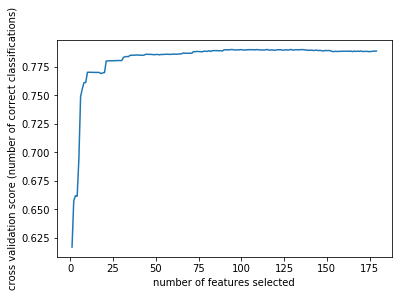

In [116]:
plt.figure()
plt.xlabel('number of features selected')
plt.ylabel('cross validation score (number of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
'''plt.figure()
plt.xlabel('number of features selected')
plt.ylabel('cross validation score (number of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()'''

In [121]:
var_selected

,ranking,variable
0,1,address-zip5-dob_0_count_address-zip5-dob_30_c...
1,1,address-zip5-dob_1_count_address-zip5-dob_30_c...
2,1,address-zip5-dob_count30_date
3,1,address-zip5-homephone_0_count_address-zip5-ho...
4,1,address-zip5-homephone_count0_date
5,1,address-zip5-homephone_count180_date
6,1,address-zip5-homephone_count1_date
7,1,address-zip5-homephone_count30_date
8,1,address-zip5-homephone_count3_date
9,1,address-zip5-homephone_count7_date


In [122]:
num_keep2 = round(100)
cols_keep = list(var_selected['variable'][0:num_keep2])
cols_keep

['address-zip5-dob_0_count_address-zip5-dob_30_count_Ave',
 'address-zip5-dob_1_count_address-zip5-dob_30_count_Ave',
 'address-zip5-dob_count30_date',
 'address-zip5-homephone_0_count_address-zip5-homephone_30_count_Ave',
 'address-zip5-homephone_count0_date',
 'address-zip5-homephone_count180_date',
 'address-zip5-homephone_count1_date',
 'address-zip5-homephone_count30_date',
 'address-zip5-homephone_count3_date',
 'address-zip5-homephone_count7_date',
 'address-zip5-homephone_count90_date',
 'address-zip5_0_count_address-zip5_180_count_Ave',
 'address-zip5_0_count_address-zip5_30_count_Ave',
 'address-zip5_0_count_address-zip5_7_count_Ave',
 'address-zip5_1_count_address-zip5_180_count_Ave',
 'address-zip5_1_count_address-zip5_30_count_Ave',
 'address-zip5_1_count_address-zip5_7_count_Ave',
 'address-zip5_count0_date',
 'address-zip5_count180_date',
 'address-zip5_count1_date',
 'address-zip5_count30_date',
 'address-zip5_count3_date',
 'address-zip5_count7_date',
 'address-zip5_co

In [123]:
cols_keep.insert(0, 'FraudLabel')
len(cols_keep)

101

In [124]:
vars_keep = myData1.filter(cols_keep, axis = 1)
vars_keep

,address-zip5-dob_0_count_address-zip5-dob_30_count_Ave,address-zip5-dob_1_count_address-zip5-dob_30_count_Ave,address-zip5-dob_count30_date,address-zip5-homephone_0_count_address-zip5-homephone_30_count_Ave,address-zip5-homephone_count0_date,address-zip5-homephone_count180_date,address-zip5-homephone_count1_date,address-zip5-homephone_count30_date,address-zip5-homephone_count3_date,address-zip5-homephone_count7_date,...,ssn-lastname_count0_date,ssn-lastname_count180_date,ssn-lastname_count1_date,ssn-lastname_count30_date,ssn-lastname_count7_date,ssn-lastname_count90_date,ssn-name-dob_0_count_ssn-name-dob_30_count_Ave,ssn-name-dob_0_count_ssn-name-dob_7_count_Ave,ssn-name-dob_1_count_ssn-name-dob_180_count_Ave,ssn-name-dob_1_count_ssn-name-dob_30_count_Ave
0,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
1,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
2,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
3,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
4,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
5,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
6,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
7,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
8,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00
9,30.00,30.00,1,30.00,1,1,1,1,1,1,...,1,1,1,1,1,1,30.00,7.00,180.00,30.00


In [125]:
vars_keep.shape

(1002789, 100)

In [126]:
%%time
model = LogisticRegression()
rfecv = RFECV(estimator = model, step = 1, cv= 3, verbose = 3, n_jobs = -1, scoring = 'roc_auc')
rfecv.fit(vars_keep, Y)

Fitting estimator with 100 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 99 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 98 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 97 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 96 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 95 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 94 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 24min 5s, sys: 21.8 s, total: 24min 27s
Wall time: 2h 43min 5s


In [127]:
print('Optimal number of features %d' % rfecv.n_features_)

Optimal number of features 93


In [128]:
var_selected = pd.DataFrame(sorted(zip(map( lambda x: round(x), rfecv.ranking_), myData1.columns)), \
                            columns = ['ranking', 'variable'])
pd.options.display.max_rows = 150
print(var_selected)

    ranking                                           variable
0         1  address-zip5-homephone_0_count_address-zip5-ho...
1         1  address-zip5-homephone_0_count_address-zip5-ho...
2         1               address-zip5-homephone_count180_date
3         1                 address-zip5-homephone_count1_date
4         1                 address-zip5-homephone_count7_date
5         1                address-zip5-homephone_count90_date
6         1    address-zip5_0_count_address-zip5_180_count_Ave
7         1     address-zip5_0_count_address-zip5_30_count_Ave
8         1      address-zip5_0_count_address-zip5_7_count_Ave
9         1     address-zip5_1_count_address-zip5_30_count_Ave
10        1      address-zip5_1_count_address-zip5_7_count_Ave
11        1                           address-zip5_count0_date
12        1                          address-zip5_count30_date
13        1                           address-zip5_count3_date
14        1                           address-zip5_coun

In [129]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 8,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

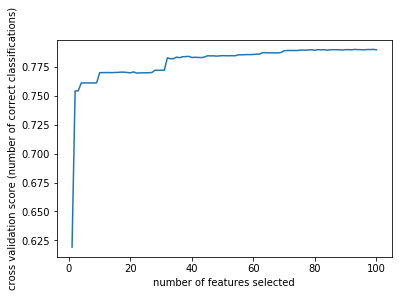

In [130]:
plt.figure()
plt.xlabel('number of features selected')
plt.ylabel('cross validation score (number of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Using Wrapper to eliminate features

In [131]:
num_keep2 = 40
cols_keep = list(var_selected['variable'][0:num_keep2])
cols_keep

['address-zip5-homephone_0_count_address-zip5-homephone_30_count_Ave',
 'address-zip5-homephone_0_count_address-zip5-homephone_7_count_Ave',
 'address-zip5-homephone_count180_date',
 'address-zip5-homephone_count1_date',
 'address-zip5-homephone_count7_date',
 'address-zip5-homephone_count90_date',
 'address-zip5_0_count_address-zip5_180_count_Ave',
 'address-zip5_0_count_address-zip5_30_count_Ave',
 'address-zip5_0_count_address-zip5_7_count_Ave',
 'address-zip5_1_count_address-zip5_30_count_Ave',
 'address-zip5_1_count_address-zip5_7_count_Ave',
 'address-zip5_count0_date',
 'address-zip5_count30_date',
 'address-zip5_count3_date',
 'address-zip5_count7_date',
 'address-zip5_count90_date',
 'address_0_count_address_180_count_Ave',
 'address_0_count_address_30_count_Ave',
 'address_0_count_address_7_count_Ave',
 'address_1_count_address_7_count_Ave',
 'address_count0_date',
 'address_count180_date',
 'address_count1_date',
 'address_count30_date',
 'address_count3_date',
 'address_cou

In [132]:
cols_keep.insert(0, 'FraudLabel')
len(cols_keep)

41

In [133]:
vars_keep = myData1.filter(cols_keep, axis = 1)
vars_keep

,address-zip5-homephone_0_count_address-zip5-homephone_30_count_Ave,address-zip5-homephone_0_count_address-zip5-homephone_7_count_Ave,address-zip5-homephone_count180_date,address-zip5-homephone_count1_date,address-zip5-homephone_count7_date,address-zip5-homephone_count90_date,address-zip5_0_count_address-zip5_180_count_Ave,address-zip5_0_count_address-zip5_30_count_Ave,address-zip5_0_count_address-zip5_7_count_Ave,address-zip5_1_count_address-zip5_30_count_Ave,...,homephone_count30_date,homephone_count3_date,homephone_count7_date,name-dob_0_count_name-dob_30_count_Ave,name-dob_0_count_name-dob_7_count_Ave,name-dob_count180_date,name-dob_count1_date,name-dob_count30_date,name-dob_count3_date,name-dob_count7_date
0,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,2,2,2,30.00,7.00,1,1,1,1,1
1,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1
2,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1
3,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1
4,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1
5,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1
6,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1
7,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1
8,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1
9,30.00,7.00,1,1,1,1,180.00,30.00,7.00,30.00,...,1,1,1,30.00,7.00,1,1,1,1,1


In [134]:
vars_keep.shape

(1002789, 40)

In [135]:
%%time
model = LogisticRegression()
rfecv = RFECV(estimator = model, step = 1, cv= 5, verbose = 3, n_jobs = -1, scoring = 'roc_auc')
rfecv.fit(vars_keep, Y)

Fitting estimator with 40 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 39 features.


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yifengwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 2min 24s, sys: 5.75 s, total: 2min 30s
Wall time: 18min 46s


In [136]:
print('Optimal number of features %d' % rfecv.n_features_)

Optimal number of features 38


In [137]:
var_selected = pd.DataFrame(sorted(zip(map( lambda x: round(x), rfecv.ranking_), myData1.columns)), \
                            columns = ['ranking', 'variable'])
pd.options.display.max_rows = 150
print(var_selected)

    ranking                                        variable
0         1             address-zip5-homephone_count30_date
1         1  address-zip5_0_count_address-zip5_30_count_Ave
2         1   address-zip5_0_count_address-zip5_7_count_Ave
3         1                        address-zip5_count0_date
4         1                      address-zip5_count180_date
5         1                        address-zip5_count1_date
6         1                       address-zip5_count30_date
7         1                        address-zip5_count3_date
8         1                        address-zip5_count7_date
9         1                       address-zip5_count90_date
10        1           address_0_count_address_180_count_Ave
11        1            address_0_count_address_30_count_Ave
12        1             address_0_count_address_7_count_Ave
13        1                             address_count0_date
14        1                           address_count180_date
15        1                             

In [138]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

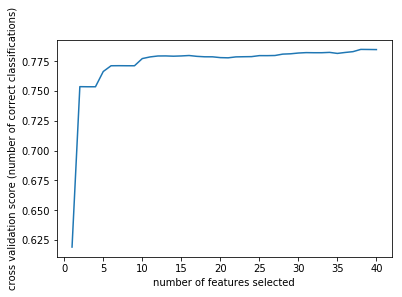

In [139]:
plt.figure()
plt.xlabel('number of features selected')
plt.ylabel('cross validation score (number of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [140]:
file = 'featureEngineering_yifeng_final2.csv'
myData = pd.read_csv(file)
myData['FraudLabel'] = myData['fraud_label']
import datetime as dt
def str_to_datetime (x):
    return dt.datetime.strptime(x, '%Y-%m-%d')
myData['date'] = myData['date'].apply(str_to_datetime)
inTimeData = myData[myData['date'] >= '2016-01-14'].copy()
inTimeData = inTimeData[inTimeData['date'] < '2016-11-01'].copy()
outTimeData = myData[myData['date'] >= '2016-11-01'].copy()
outTimeData.head(4)

,Unnamed: 0,Unnamed: 0.1,date,ssn,firstname,lastname,address,zip5,dob,homephone,...,RiskTable_ssn-firstname,RiskTable_ssn-lastname,RiskTable_ssn-address,RiskTable_ssn-zip5,RiskTable_ssn-dob,RiskTable_ssn-homephone,RiskTable_ssn-name,RiskTable_ssn-address-zip5,RiskTable_ssn-name-dob,FraudLabel
833507,833507,833507,2016-11-01,947154720,SUSTJTMXU,UESTMJES,6223 RSRU CT,11068,19801225,1496505617,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
833508,833508,833508,2016-11-01,182974033,REXAXJEUR,STSSESZ,2802 XRXA PL,22484,19330322,833509,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
833509,833509,833509,2016-11-01,308611124,RTMMTSZRZ,STZRUXZM,1929 RSRRS PL,38561,19281129,7318958022,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
833510,833510,833510,2016-11-01,341458429,XJEEMMJTJ,USTTRXEZ,5973 RMZTA ST,75387,19420319,4275988292,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0


In [141]:
#myData.drop('Unnamed: 0', axis =1 , inplace = True)

In [142]:
len(var_selected)

40

In [143]:
final_variables = list(var_selected['variable'][0:25])
final_variables.insert(0, 'FraudLabel')
final_variables

['FraudLabel',
 'address-zip5-homephone_count30_date',
 'address-zip5_0_count_address-zip5_30_count_Ave',
 'address-zip5_0_count_address-zip5_7_count_Ave',
 'address-zip5_count0_date',
 'address-zip5_count180_date',
 'address-zip5_count1_date',
 'address-zip5_count30_date',
 'address-zip5_count3_date',
 'address-zip5_count7_date',
 'address-zip5_count90_date',
 'address_0_count_address_180_count_Ave',
 'address_0_count_address_30_count_Ave',
 'address_0_count_address_7_count_Ave',
 'address_count0_date',
 'address_count180_date',
 'address_count1_date',
 'address_count30_date',
 'address_count3_date',
 'address_count7_date',
 'address_count90_date',
 'name-dob_count180_date',
 'name-dob_count30_date',
 'name-dob_count90_date',
 'ssn-dob_count180_date',
 'ssn-dob_count30_date']

In [144]:
inTimeData = inTimeData.filter(final_variables ,axis = 1)
outTimeData = outTimeData.filter(final_variables ,axis = 1)
inTimeData.to_csv('finalVariable_inTimeData3.csv')
outTimeData.to_csv('finalVariable_outTimeData3.csv')

In [145]:
outTimeData.head(5)

,FraudLabel,address-zip5-homephone_count30_date,address-zip5_0_count_address-zip5_30_count_Ave,address-zip5_0_count_address-zip5_7_count_Ave,address-zip5_count0_date,address-zip5_count180_date,address-zip5_count1_date,address-zip5_count30_date,address-zip5_count3_date,address-zip5_count7_date,...,address_count1_date,address_count30_date,address_count3_date,address_count7_date,address_count90_date,name-dob_count180_date,name-dob_count30_date,name-dob_count90_date,ssn-dob_count180_date,ssn-dob_count30_date
833507,0,1,30.00,7.00,1,2,1,1,1,1,...,1,1,1,1,1,2,1,1,2,1
833508,0,1,30.00,7.00,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
833509,0,2,15.00,7.00,1,2,1,2,1,1,...,1,2,1,1,2,2,2,2,2,2
833510,0,1,30.00,7.00,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
833511,0,1,30.00,7.00,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [146]:
print(inTimeData[inTimeData['FraudLabel'] == 0].shape)

(789000, 26)


In [147]:
inTimeData[inTimeData['FraudLabel'] == 1].shape

(11542, 26)

In [148]:
outTimeData[outTimeData['FraudLabel'] == 0].shape

(164107, 26)

In [149]:
outTimeData.shape

(166493, 26)

In [150]:
outTimeData[outTimeData['FraudLabel'] == 1].shape

(2386, 26)

In [ ]:
'''file = 'featureEngineering_yifeng.csv'
myData = pd.read_csv(file)
myData = myData.sort_values(by = 'Unnamed: 0').copy()
myData['FraudLabel'] = myData['Fraud']
import datetime as dt
def str_to_datetime (x):
    return dt.datetime.strptime(x, '%Y-%m-%d')
myData['Date'] = myData['Date'].apply(str_to_datetime)
inTimeData = myData[myData['Date'] >= '2010-01-14'].copy()
inTimeData = inTimeData[inTimeData['Date'] < '2010-11-1'].copy()
outTimeData = myData[myData['Date'] >= '2010-11-1'].copy()
outTimeData.head(4)'''

In [ ]:
'''Y = inTimeData['FraudLabel']
inTimeData.drop('FraudLabel', axis = 1, inplace = True)
inTimeData.drop('Unnamed: 0', axis = 1, inplace = True)'''

In [ ]:
'''Good_Feature.shape'''

In [ ]:
'''vars_keep = inTimeData.filter(Good_Feature_list, axis = 1)
vars_keep.shape'''

In [ ]:
'''vars_keep'''

In [ ]:
'''# Recursive feature selection: backward
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(vars_keep, Y)
print("Num Features: %s" % (fit.n_features_))
# Final 20 features
'''

In [ ]:
'''final_variables = list(vars_keep.columns.values[fit.support_])
final_variables'''

In [ ]:
'''final_variables.insert(0 ,'FraudLabel')
data = myData.filter(final_variables ,axis = 1)
data'''

In [ ]:
'''data.shape'''

In [ ]:
#---------------------------------------------------------------------------
#***********************BELOW IS JUST APPENDIX******************************
#---------------------------------------------------------------------------

In [ ]:
%%time
#Y = inTimeData['FraudLabel']

model = LogisticRegression()
rfecv = RFECV(estimator = model, step = 1, cv= 4, verbose = 3, n_jobs = -1, scoring = 'roc_auc')
rfecv.fit(vars_keep, Y)

In [ ]:
print('Optimal number of features %d' % rfecv.n_features_)

In [ ]:
var_selected = pd.DataFrame(sorted(zip(map( lambda x: round(x), rfecv.ranking_), inTimeData.columns)), \
                            columns = ['ranking', 'variable'])
pd.options.display.max_rows = 150
print(var_selected)

In [ ]:
rfecv.ranking_

In [ ]:
plt.figure()
plt.xlabel('number of features selected')
plt.ylabel('cross validation score (number of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
cols_keep = list(var_selected['variable'][0:40])
cols_keep

In [ ]:
cols_keep.insert(0 ,'FraudLabel')
data = myData.filter(cols_keep ,axis = 1)
data

In [ ]:
data.shape

In [ ]:
file = 'featureEngineering_yifeng.csv'
myData = pd.read_csv(file)
myData = myData.sort_values(by = 'Unnamed: 0').copy()
myData['FraudLabel'] = myData['Fraud']
import datetime as dt
def str_to_datetime (x):
    return dt.datetime.strptime(x, '%Y-%m-%d')
myData['Date'] = myData['Date'].apply(str_to_datetime)
inTimeData = myData[myData['Date'] >= '2010-01-14'].copy()
inTimeData = inTimeData[inTimeData['Date'] < '2010-11-1'].copy()
outTimeData = myData[myData['Date'] >= '2010-11-1'].copy()
outTimeData.head(4)

In [ ]:
inTimeData = inTimeData.filter(cols_keep ,axis = 1)
outTimeData = outTimeData.filter(cols_keep ,axis = 1)
inTimeData.to_csv('finalVariable_inTimeData2.csv')
outTimeData.to_csv('finalVariable_outTimeData2.csv')

In [ ]:
print(inTimeData[inTimeData['FraudLabel'] == 0].shape)
print(inTimeData[inTimeData['FraudLabel'] == 1].shape)
print(outTimeData[outTimeData['FraudLabel'] == 0].shape)
print(outTimeData[outTimeData['FraudLabel'] == 1].shape)

In [ ]:
file = 'featureEngineering_yifeng.csv'
myData = pd.read_csv(file)
myData = myData.sort_values(by = 'Unnamed: 0').copy()
myData['FraudLabel'] = myData['Fraud']
myData.head(5)